# Part II -  Understanding User Behavior in the Ford GoBike System
## by Quan Nguyen Bao

## Investigation Overview


The objective of this presentation is to delve into the usage dynamics of the Ford GoBike System, with a focus on understanding user patterns related to user types, trip durations, and time patterns.


## Dataset Overview and Executive Summary

The Ford GoBike System dataset contains comprehensive information about bike trips taken by users, including trip duration, start and end points, user demographics, and bike share details. Here's a summary of key insights from the exploratory analysis:

- The distribution of trip durations peaks around short durations, indicating that most trips are of relatively short distances.
- Subscriber users tend to have shorter trip durations compared to customers, suggesting different usage patterns between these user types.
- Hourly and weekly usage patterns reveal peak utilization during typical commuting hours on weekdays, with Tuesday, Wednesday, and Thursday being the busiest days.
- Ford GoBike usage trends vary between subscribers and customers, with subscribers showing spikes in usage during certain periods, possibly due to promotional events or external factors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


## Visualization 1: Frequency of Bike Share Utilization for All Trips

Question: What is the distribution of bike share utilization for all trips?

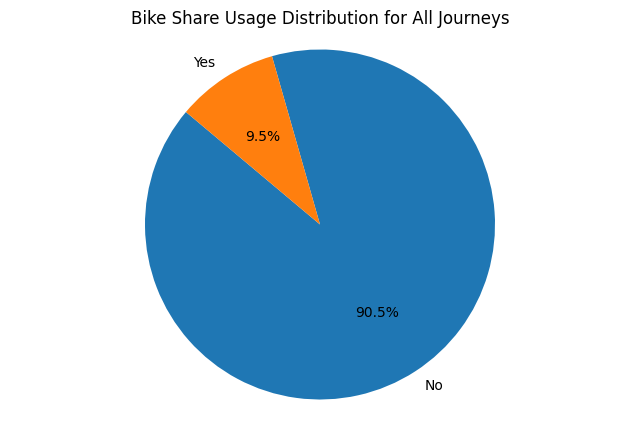

In [3]:
# Calculate the distribution of bike share for all trips
bike_share_distribution = df['bike_share_for_all_trip'].value_counts()

# Pie chart
plt.figure(figsize=(8, 5))
plt.pie(bike_share_distribution, labels=bike_share_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Bike Share Usage Distribution for All Journeys')
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()


The pie chart illustrates the distribution of bike share utilization for all journeys. It reveals that 90.5% of trips do not utilize bike share for the entire journey, while 9.5% of trips do.

## Visualization 2: Temporal Distribution of Ford GoBike Trips

Question: How do the number of Ford GoBike trips vary by hour of day and day of week?

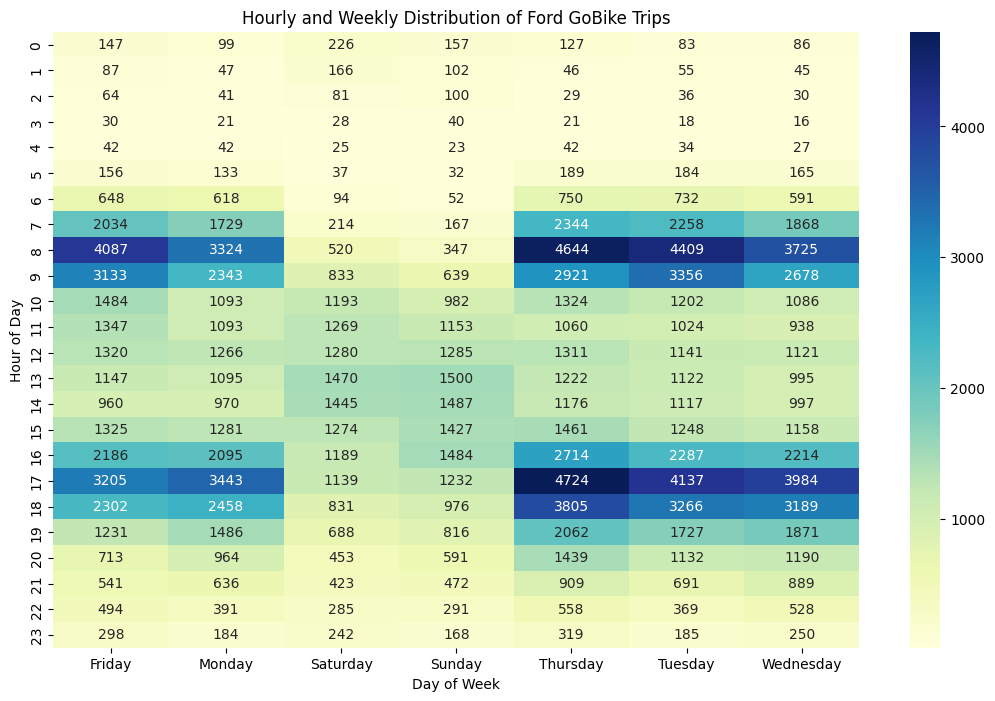

In [4]:
# Assuming 'start_time' column is in datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_day_of_week'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

heatmap_data = df.pivot_table(index='start_hour', columns='start_day_of_week', values='bike_id', aggfunc='count')
plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Hourly and Weekly Distribution of Ford GoBike Trips")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()

Observation: 

The heatmap illustrates the hourly and weekly distribution of Ford GoBike trips. It reveals that peak usage occurs during typical commuting hours, specifically between 7-9 am and 4-6 pm. This suggests that many individuals utilize the bike service for work-related transportation, emphasizing its role in facilitating daily commutes. 

Additionally, weekdays experience significantly higher usage compared to weekends, with Monday, Tuesday, Wednesday, and Thursday, Friday emerging as the most popular days for bike trips. 

This trend implies that the bikes are predominantly used for weekday activities, such as commuting to work or running errands.

## Visualization 3: Categorization of Trip Duration by User type

Question: How does trip duration vary between different user types?

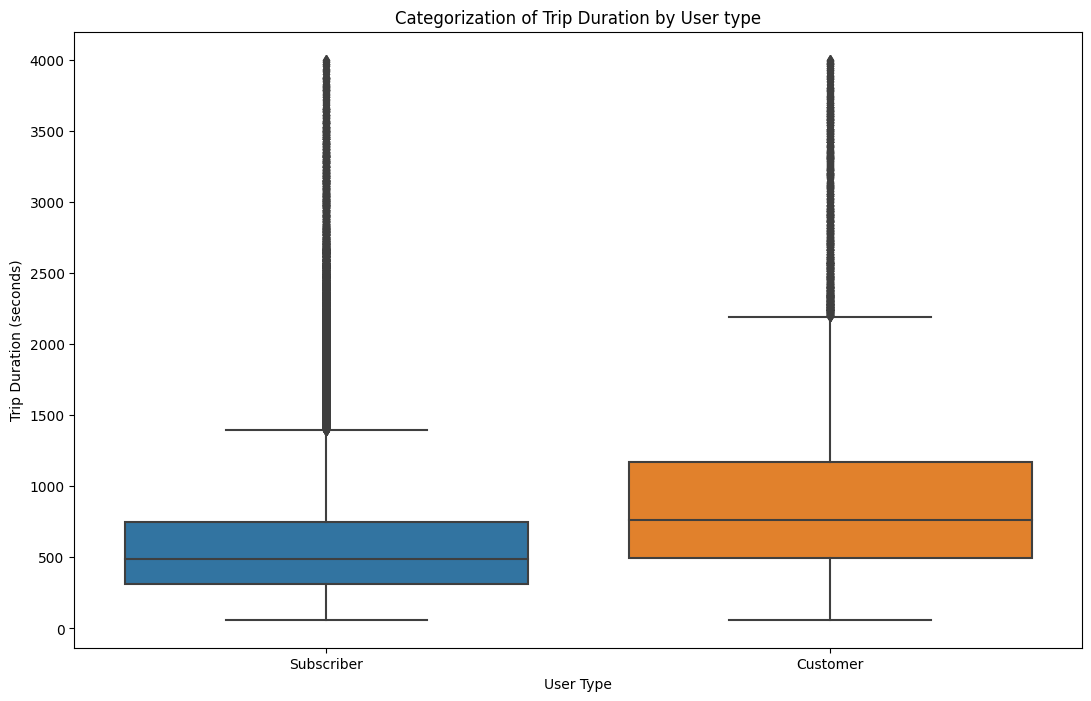

In [5]:
# Filter out extreme trip durations for better visualization
df_filtered = df[df['duration_sec'] < 4000]

# Set up the figure and axis
plt.figure(figsize=(13, 8))

# Create the box plot
sns.boxplot(x="user_type", y="duration_sec", data=df_filtered)

# Add title and labels
plt.title("Categorization of Trip Duration by User type")
plt.ylabel("Trip Duration (seconds)")
plt.xlabel("User Type")

# Show the plot
plt.show()

Observation: The box plot categorizes trip duration by user type, allowing us to compare the distribution of trip durations for subscribers and customers.

Subscribers generally have shorter trip durations, potentially reflecting their usage for daily commuting or short errands. Conversely, customers exhibit a wider range of trip durations, indicating more varied purposes such as leisure or exploration trips.

### Conclusion
In conclusion, the insights derived from these analyses provide a comprehensive understanding of user behavior and preferences within the bike-sharing system. By recognizing peak usage times, understanding trip duration patterns, and differentiating user types, stakeholders can optimize system operations, enhance user experience, and develop targeted marketing strategies to further promote bike-sharing initiatives.

In [6]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_II_notebook.ipynb

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 551454 bytes to Part_II_notebook.html
